# Predication Classfication Analysis on Stroke dataset:

## Introduction

**Relevant background information**
<br/>
The topic we will explore is about factors that may cause a stroke. We choose this topic because according to World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. Every year, this number increases dramatically, especially among people over the age of 70. However,  a lot of strokes are avoidable, so we'll explore what symptoms a patient has when they mean they're at high risk for stroke.


**Question we try to answer with your project:**
<br/>
Type of question we will answer: **predictive**
<br/>
Can we use the stroke dataset measurements to predict whether a future patient, with unknown diagnosis, is likely to have a stroke?
<br/>

**Identify and describe the dataset that will be used to answer the question**
<br/>
The dataset is called Stroke Prediction Dataset. It contains medical patients' information including gender, age, martial status, previous heart complications, work type and more. However, we are mainly interested in finding only couple factors that we think are important in considering whether they have an impact on the patient's likelyhood for a stroke. For that reason, we think that it would be  relevant to choose patient information relating to their *age*, *average glucose level* and *BMI*. 

## Exploratory Data Analysis

 **We will first load in the necessary libraries for the exploratory data analysis:**

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
options(readr.show_col_types = FALSE)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**We will set the seed and load in the data from the original source from the web:** 

In [6]:
set.seed(1)
download.file("https://raw.githubusercontent.com/Hannahli6/dsci_project/main/stroke_dataset.csv", 'stroke_dataset.csv')
stroke_data <- read_csv('stroke_dataset.csv')

### **Data wrangling & Cleaning to a format for exploratory data analysis:**
- We will convert 1 = "Yes", 0 = "No" for the stroke column, for clearer format

In [7]:
stroke_column <- stroke_data |>
            mutate(stroke = as.character(stroke)) |>
            select(stroke) 
stroke_column[stroke_column == 1] <- "Yes"
stroke_column[stroke_column == 0] <- "No"


stroke_data["stroke"] <- stroke_column |>
        mutate(stroke = as_factor(stroke))

stroke_data <- stroke_data |>
    select(stroke, age, avg_glucose_level, bmi)

**We will split the data into training and testing data**

In [5]:
#Split the data into training
stroke_data_split <- initial_split(stroke_data, prop = 0.75, strata = stroke)  
stroke_data_training <- training(stroke_data_split)  
stroke_data_testing <- testing(stroke_data_split)

### **Missing data:**
- only the BMI column has missing data
- here, we counted the number of missing data

In [8]:
#missing data
stroke_data_missing <- stroke_data_training|>
    filter(bmi == "N/A") |>
    summarize(missing_data = n())
stroke_data_missing

missing_data
<int>
146


### **Summarise Exploratory Data:**
1. filtered out the missing information from the BMI column
2. Changed BMI to numeric
3. We used group by and summarise to find the how many patient had stroke, their average age, average glucose level and average BMI in comparison to patient that never had a stroke

In [9]:
#summarize exploratory data
num_obs <- nrow(stroke_data_training) 
summarize_data <- stroke_data_training|>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    group_by(stroke) |>
    summarize(count = n(), percentage = n() / num_obs * 100 , avg_age = mean(age), avg_glucose_level= mean(avg_glucose_level), 
              avg_bmi = mean(bmi))
    
summarize_data 

stroke,count,percentage,avg_age,avg_glucose_level,avg_bmi
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Yes,168,4.384134,67.78571,135.1916,30.53095
No,3518,91.805846,41.89125,103.6027,28.83030



### **Visualization of Exploratory Data:**

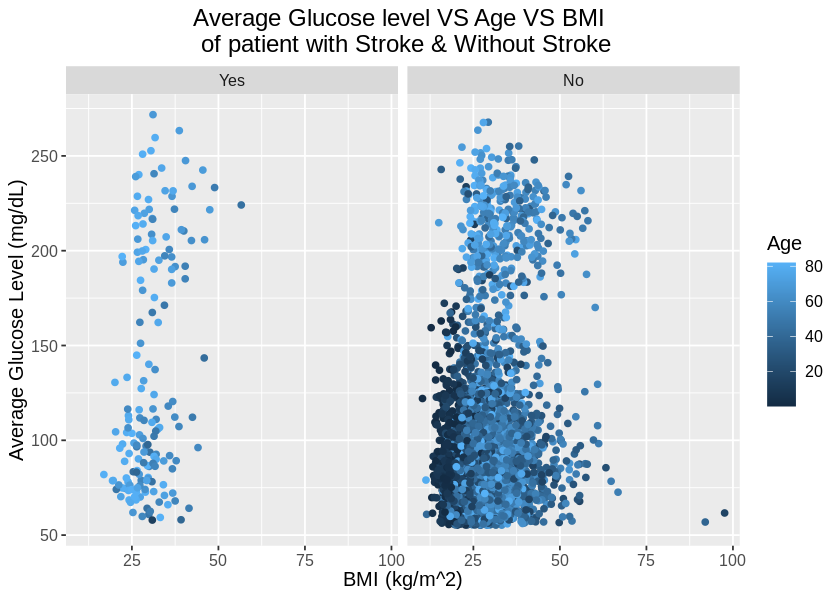

In [17]:
options(repr.plot.width=7, repr.plot.height=5)
stroke_plot <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    ggplot(aes (x= bmi, y=avg_glucose_level, color= age)) +
    facet_grid(~stroke) +
    geom_point() +
    labs(x= "BMI (kg/m^2)", y = "Average Glucose Level (mg/dL)", colour = "Age" ,title = "Average Glucose level VS Age VS BMI \n of patient with Stroke & Without Stroke") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot

**Based on the visualization:**
<br/>
... add why ... What is the relationship? ... 
what information you see from your EDA, and how this informs your future decisions/conclusions is needed. For example, are the classes balanced? Are you going to use these variables in the model because of the EDA relationships you can see? 
<br/>

The scatter plot suggested we are expected to find a relationship between age, average glucose level, and the likelihood of having a stroke. And the anticipation is that elder people with higher average glucose levels are more likely to have a stroke.

## **Data Anaylsis: Classification**

### **Discussion:**
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

## **References:**
- list